**IMOPRTING LIBRARIES**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV

**READING DATA USING PANDAS**

In [2]:
data = pd.read_csv("./dataset.csv")
data.head()

,Unnamed: 0,volt,current,soc,max_single_volt,min_single_volt,max_temp,min_temp,timestamp,car,label,charge_segment,mileage
0,0,38.91657,-8.07,35.0,3.6435,3.6286,28.0,24.0,1.0,471,0,1,19974.6498
1,1,38.95108,-14.96,35.0,3.6481,3.6340,28.0,24.0,11.0,471,0,1,19974.6498
2,2,38.97250,-14.64,35.0,3.6491,3.6341,27.9,24.0,21.0,471,0,1,19974.6498
3,3,38.97250,-14.99,35.0,3.6501,3.6351,27.0,24.0,31.0,471,0,1,19974.6498
4,4,38.97607,-14.90,35.0,3.6510,3.6361,27.0,24.0,41.0,471,0,1,19974.6498


**ENCODING DATA**

In [3]:
# ohe = OneHotEncoder()
# ohe.fit(data[['product']])
# ct=make_column_transformer((OneHotEncoder(),[0]),remainder='passthrough')

**DENPENDENT AND INDIPENDENT VARIABLES**

In [4]:
x = data.iloc[:,[1,2,6]].values
y = data.iloc[:, [10]].values

In [5]:
x

array([[ 38.91657,  -8.07   ,  28.     ],
       [ 38.95108, -14.96   ,  28.     ],
       [ 38.9725 , -14.64   ,  27.9    ],
       ...,
       [ 41.9951 , -17.59   ,  27.     ],
       [ 41.9951 , -17.51   ,  27.     ],
       [ 41.99748, -17.6    ,  27.     ]])

In [6]:
y


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int64)

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

**DIVIDING THE DATA INTO TRAINING AND TESTING SET**

In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [9]:
x_train

array([[  40.20058, -116.2    ,   28.     ],
       [  42.6139 , -103.85   ,   33.     ],
       [  44.8035 ,  -13.7    ,   28.     ],
       ...,
       [  42.7924 ,  -17.29   ,   27.     ],
       [  43.42667,  -77.59   ,   34.     ],
       [  44.23468,  -40.59   ,   31.     ]])

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

# Models

In [12]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred=gnb.predict(x_test)


In [13]:
y_pred

array([10, 10, 10, ...,  0, 10, 10], dtype=int64)

In [14]:
from sklearn.metrics import classification_report
a=classification_report(y_test, y_pred)

In [15]:
print(a)

              precision    recall  f1-score   support

           0       0.76      0.63      0.68      5332
          10       0.65      0.77      0.71      4799

    accuracy                           0.70     10131
   macro avg       0.70      0.70      0.70     10131
weighted avg       0.71      0.70      0.70     10131



In [16]:
gnb.get_params()

{'priors': None, 'var_smoothing': 1e-09}

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6966735761524036

In [18]:
accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred_kn)
precision = precision_score(y_test, y_pred, pos_label=10)
recall = recall_score(y_test, y_pred, pos_label=10)
f1 = f1_score(y_test, y_pred, pos_label=10)
conf_matrix = confusion_matrix(y_test, y_pred)
roc_score = roc_auc_score(y_test, y_pred)
precision, recall, _ = precision_recall_curve(y_test, y_pred, pos_label=10)

In [19]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC Score:", roc_score)

Accuracy: 0.6966735761524036
Precision: [0.4736946  0.65108543 1.        ]
Recall: [1.         0.77495312 0.        ]
F1 Score: 0.7076396156407573
Confusion Matrix:
 [[3339 1993]
 [1080 3719]]
ROC Score: 0.7005860849980156


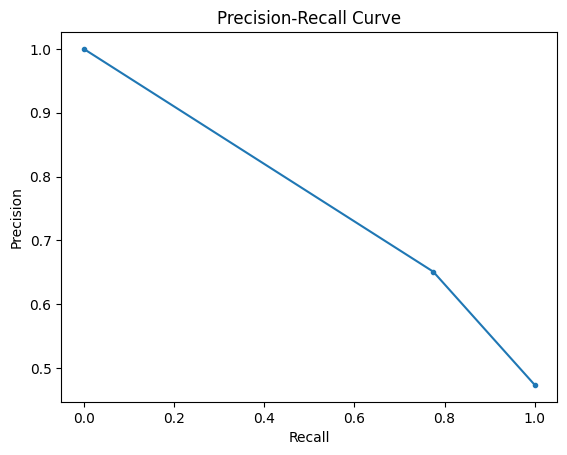

In [20]:
# Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [21]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred_l=logreg.predict(x_test)

In [22]:
a=classification_report(y_test, y_pred_l)

In [23]:
print(a)

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      5332
          10       0.65      0.71      0.68      4799

    accuracy                           0.68     10131
   macro avg       0.68      0.68      0.68     10131
weighted avg       0.68      0.68      0.68     10131



In [24]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [25]:
y_pred_l

array([10,  0, 10, ...,  0, 10,  0], dtype=int64)

In [26]:
accuracy = accuracy_score(y_test, y_pred_l)
# precision = precision_score(y_test, y_pred_kn)
precision = precision_score(y_test, y_pred_l, pos_label=10)
recall = recall_score(y_test, y_pred_l, pos_label=10)
f1 = f1_score(y_test, y_pred_l, pos_label=10)
conf_matrix = confusion_matrix(y_test, y_pred_l)
roc_score = roc_auc_score(y_test, y_pred_l)
precision, recall, _ = precision_recall_curve(y_test, y_pred_l, pos_label=10)

In [27]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC Score:", roc_score)

Accuracy: 0.6796959826275787
Precision: [0.4736946  0.64839572 1.        ]
Recall: [1.         0.70743905 0.        ]
F1 Score: 0.6766317887394121
Confusion Matrix:
 [[3491 1841]
 [1404 3395]]
ROC Score: 0.6810826156737142


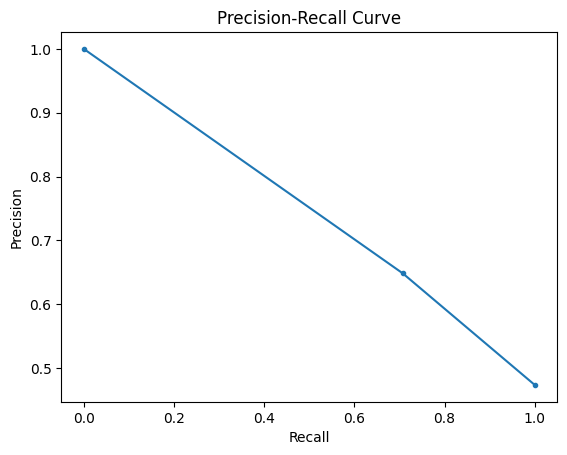

In [28]:
# Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_l)

0.6796959826275787

In [30]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred_kn=knn.predict(x_test)

In [31]:
y_pred_kn

array([10, 10, 10, ...,  0,  0, 10], dtype=int64)

In [32]:
a=classification_report(y_test, y_pred_kn)

In [33]:
print(a)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5332
          10       0.99      0.99      0.99      4799

    accuracy                           0.99     10131
   macro avg       0.99      0.99      0.99     10131
weighted avg       0.99      0.99      0.99     10131



In [34]:
import pandas as pd

# Assuming y_pred_kn contains your predictions

# Convert predictions to a pandas DataFrame
predictions_df = pd.DataFrame(y_pred_kn, columns=['Predictions'])

# Get summary statistics
summary = predictions_df.describe()

# Print the summary
print("Summary of Predictions:")
print(summary)


Summary of Predictions:
        Predictions
count  10131.000000
mean       4.718192
std        4.992298
min        0.000000
25%        0.000000
50%        0.000000
75%       10.000000
max       10.000000


In [35]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_kn)

0.9906228407857073

In [36]:
x_train

array([[  40.20058, -116.2    ,   28.     ],
       [  42.6139 , -103.85   ,   33.     ],
       [  44.8035 ,  -13.7    ,   28.     ],
       ...,
       [  42.7924 ,  -17.29   ,   27.     ],
       [  43.42667,  -77.59   ,   34.     ],
       [  44.23468,  -40.59   ,   31.     ]])

In [37]:
knn.predict([[40.5909,-114.99,36.0]])

array([10], dtype=int64)

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

In [39]:
accuracy = accuracy_score(y_test, y_pred_kn)
# precision = precision_score(y_test, y_pred_kn)
precision = precision_score(y_test, y_pred_kn, pos_label=10)
recall = recall_score(y_test, y_pred_kn, pos_label=10)
f1 = f1_score(y_test, y_pred_kn, pos_label=10)
conf_matrix = confusion_matrix(y_test, y_pred_kn)
roc_score = roc_auc_score(y_test, y_pred_kn)
precision, recall, _ = precision_recall_curve(y_test, y_pred_kn, pos_label=10)

In [40]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC Score:", roc_score)

Accuracy: 0.9906228407857073
Precision: [0.4736946  0.99205021 1.        ]
Recall: [1.         0.98812253 0.        ]
F1 Score: 0.9900824720743292
Confusion Matrix:
 [[5294   38]
 [  57 4742]]
ROC Score: 0.9904978719153636


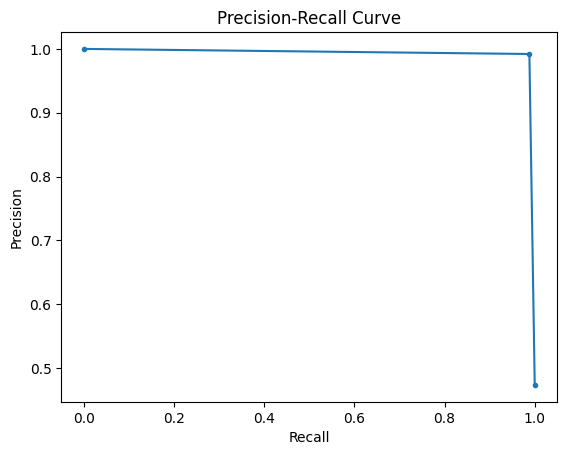

In [41]:
# Plot Precision-Recall Curve
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()



In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


X_df = pd.DataFrame(x)
y_df = pd.DataFrame(y, columns=['label'])


data = pd.concat([X_df.iloc[:, 0], X_df.iloc[:, 1], X_df.iloc[:, 2], y_df], axis=1)
data.columns = ['volt', 'current', 'temperature', 'label']



In [43]:
X_df

,0,1,2
0,38.91657,-8.07,28.0
1,38.95108,-14.96,28.0
2,38.97250,-14.64,27.9
3,38.97250,-14.99,27.0
4,38.97607,-14.90,27.0
...,...,...,...
33762,41.99510,-17.60,27.0
33763,41.99510,-17.60,27.0
33764,41.99510,-17.59,27.0
33765,41.99510,-17.51,27.0


In [44]:
y_df

,label
0,0
1,0
2,0
3,0
4,0
...,...
33762,0
33763,0
33764,0
33765,0


In [45]:
data

,volt,current,temperature,label
0,38.91657,-8.07,28.0,0
1,38.95108,-14.96,28.0,0
2,38.97250,-14.64,27.9,0
3,38.97250,-14.99,27.0,0
4,38.97607,-14.90,27.0,0
...,...,...,...,...
33762,41.99510,-17.60,27.0,0
33763,41.99510,-17.60,27.0,0
33764,41.99510,-17.59,27.0,0
33765,41.99510,-17.51,27.0,0


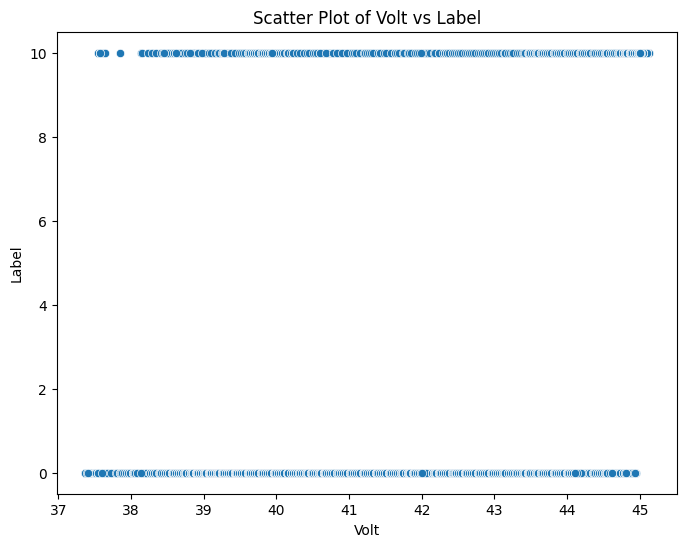

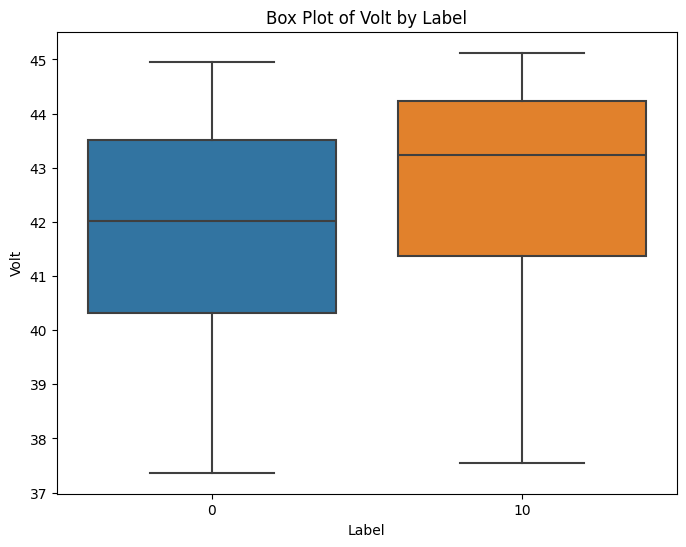

In [46]:
# Scatter Plot for Volt vs Label
plt.figure(figsize=(8, 6))
sns.scatterplot(x='volt', y='label', data=data)
plt.xlabel('Volt')
plt.ylabel('Label')
plt.title('Scatter Plot of Volt vs Label')
plt.show()

# Box Plot for Volt by Label
plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='volt', data=data)
plt.xlabel('Label')
plt.ylabel('Volt')
plt.title('Box Plot of Volt by Label')
plt.show()

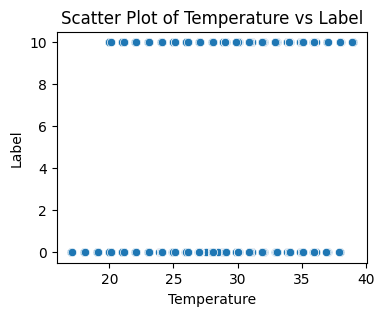

In [47]:
# Scatter Plot for Temperature vs Label
plt.figure(figsize=(4, 3))
sns.scatterplot(x='temperature', y='label', data=data)
plt.xlabel('Temperature')
plt.ylabel('Label')
plt.title('Scatter Plot of Temperature vs Label')
plt.show()

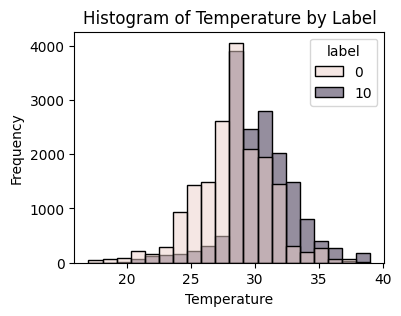

In [48]:
# Histogram
plt.figure(figsize=(4, 3))
sns.histplot(data=data, x='temperature', hue='label', kde=False, bins=20)
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title('Histogram of Temperature by Label')
plt.show()

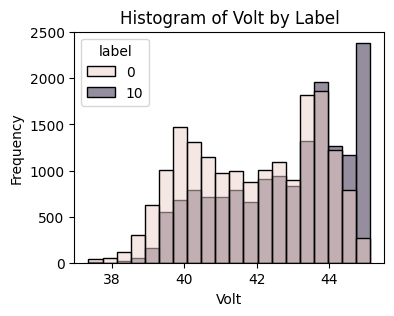

In [49]:
# Histogram
plt.figure(figsize=(4, 3))
sns.histplot(data=data, x='volt', hue='label', kde=False, bins=20)
plt.xlabel('Volt')
plt.ylabel('Frequency')
plt.title('Histogram of Volt by Label')
plt.show()

# pickle

In [50]:
import pickle
pickle.dump(y_pred_kn,open('model.pkl','wb'))

In [51]:
# pip freeze > requirements.txt

In [52]:
import session_info
session_info.show()